# 6.4 Supervised Machine Learning

In [2]:
# 1 Import Data & Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
path = r'C:\Users\turne\Chocolate Rating'

In [5]:
# Import data
df = pd.read_csv(os.path.join(path, 'Clean Data','Chocolate_clean.csv'), index_col = False)

In [6]:
df.head()

,Unnamed: 0,Company Name,Bar Name,REF,Review Date,Cacao Percent,Company Location,Rating,Bean Type,Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


# 2 Clean Data

In [7]:
df.isna().sum()

Unnamed: 0          0
Company Name        0
Bar Name            0
REF                 0
Review Date         0
Cacao Percent       0
Company Location    0
Rating              0
Bean Type           0
Bean Origin         0
dtype: int64

In [8]:
#Checked for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1790    False
1791    False
1792    False
1793    False
1794    False
Length: 1795, dtype: bool

In [9]:
# Delete unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df

,Company Name,Bar Name,REF,Review Date,Cacao Percent,Company Location,Rating,Bean Type,Bean Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India


# 3 Data prep for regression analysis - Create Scatterplot

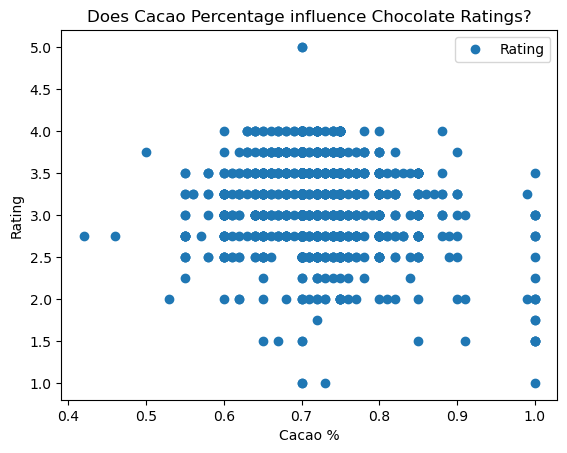

In [13]:
# Create a scatterplot to compare the Chocolate Ratings and Cacao Percent
df.plot(x = 'Cacao Percent', y= 'Rating' ,style='o')
plt.title('Does Cacao Percentage influence Chocolate Ratings?')
plt.xlabel('Cacao %')
plt.ylabel('Rating')
plt.show()

## Hypothesis: If Cacao Percent is 70% or higher, then it has a rating of 3 or higher. 

In [18]:
# Reshape variables for regression
X = df['Cacao Percent'].values.reshape(-1, 1)
y = df['Rating'].values.reshape(-1, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [20]:
# Create linear regression object
regression = LinearRegression()

In [21]:
# Fit regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
y_predicted = regression.predict(X_test)

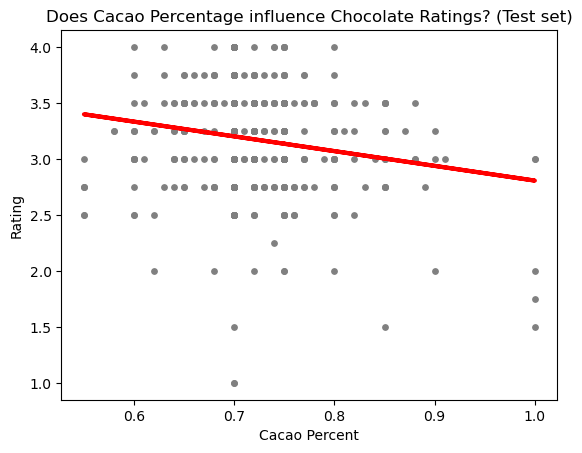

In [23]:
# Create a plot that shows the regression line from the model on the Test Set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Does Cacao Percentage influence Chocolate Ratings? (Test set)')
plot_test.xlabel('Cacao Percent')
plot_test.ylabel('Rating')
plot_test.show()

## Hypothesis Evaluation: The higher the Cacao Percent the rarer the chances of a rating over 3.  Averages show it at the 2.75-3.4 Rating.  

In [24]:
# Create objects for model mean squared error (MSE) and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [25]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.31614192]]
Mean squared error:  0.20955355353948135
R2 score:  0.018023691778551565


## Evaluation Continues: The slope indicates a negative relationship of ratings potentially dropping as the Cacao Percent increases. The MSE is a 0.209 which is in my opinion small compared to how small the data is.  Lastly, the R2 score is a 0.018 which is a poor fit. 

In [26]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135391
1,2.75,3.174875
2,2.50,3.201198
3,3.25,3.201198
4,3.25,3.069584
5,2.75,3.398619
6,3.50,3.201198
7,2.50,3.135391
8,3.50,3.253844
9,3.50,3.267005


## Evaluation: Predicted values are stretched out and not close to the actual values, proving the model to be a poor fit.  Perhaps a better fitting model would be to check the Cacao Percent between 50%-85% have higher ratings.